Episode 1000/500000 — Last Reward: 0.00 — Count State: (-4.0,)
Episode 2000/500000 — Last Reward: 0.00 — Count State: (1.0,)
Episode 3000/500000 — Last Reward: -1.00 — Count State: (3.0,)
Episode 4000/500000 — Last Reward: 2.00 — Count State: (0.0,)
Episode 5000/500000 — Last Reward: 1.00 — Count State: (0.0,)
Episode 6000/500000 — Last Reward: 1.00 — Count State: (-2.0,)
Episode 7000/500000 — Last Reward: 0.00 — Count State: (-0.0,)
Episode 8000/500000 — Last Reward: -1.00 — Count State: (3.0,)
Episode 9000/500000 — Last Reward: 1.00 — Count State: (1.0,)
Episode 10000/500000 — Last Reward: -1.00 — Count State: (0.0,)
Episode 11000/500000 — Last Reward: 1.00 — Count State: (1.0,)
Episode 12000/500000 — Last Reward: -1.00 — Count State: (-4.0,)
Episode 13000/500000 — Last Reward: 1.00 — Count State: (-1.0,)
Episode 14000/500000 — Last Reward: 0.00 — Count State: (-0.0,)
Episode 15000/500000 — Last Reward: 3.00 — Count State: (2.0,)
Episode 16000/500000 — Last Reward: 1.00 — Count State

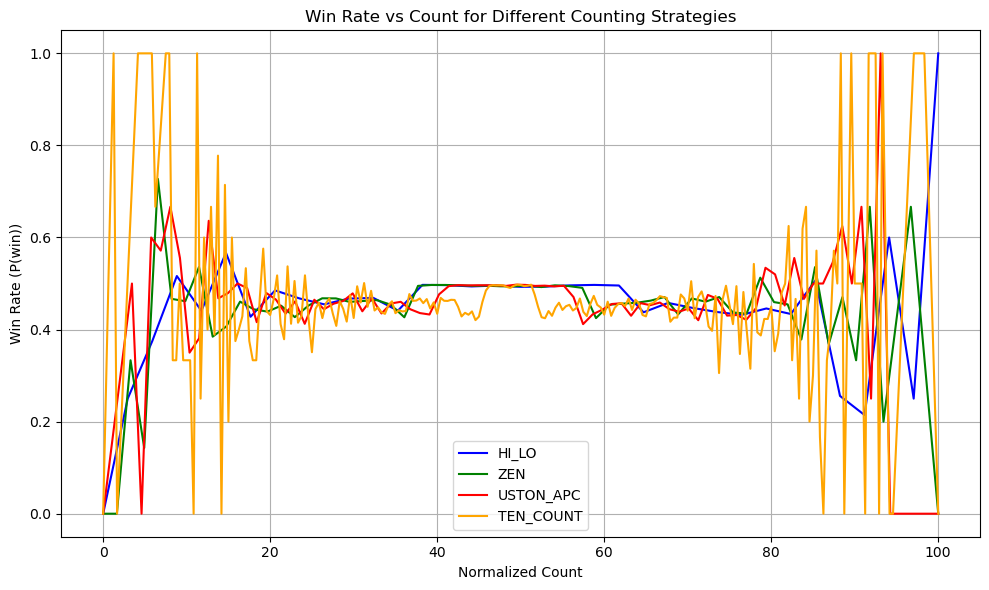

In [2]:
import matplotlib.pyplot as plt
from DQNAgent import DQNAgent
from split_environment import BlackjackEnv
from Supervised_betting import collect_dictionary
import numpy as np
from split_environment import BlackjackEnv
from basic_strategy_agent import BasicStrategyAgent
from split_train_agent import evaluate_agent
from Supervised_betting import collect_dictionary
from Supervised_betting import evaluate_nn_betting_agent
from BettingModel import train_betting_nn
from HiloAgent import HiLoBettingAgent
from BasicStrategyAgent import BasicStrategyAgent

count_types = ["hi_lo", "zen", "uston_apc", "ten_count"]
colors = ["blue", "green", "red", "orange"]
num_episodes = 500000

plt.figure(figsize=(10, 6))

for count_type, color in zip(count_types, colors):
    print(f"Collecting dictionary for {count_type}...")
    
    agent = BasicStrategyAgent()
    env = BlackjackEnv(count_type=count_type)
    
    count_reward_dict = collect_dictionary(agent, env, count_type, num_episodes)

    x_vals = []
    y_vals = []
    
    for count_state, (avg_reward, _) in count_reward_dict.items():
        x_vals.append(count_state[0] if isinstance(count_state, tuple) else count_state)
        y_vals.append(avg_reward)
    
    xmin, xmax = min(x_vals), max(x_vals)
    x_vals = [(x - xmin) / (xmax - xmin) * 100 for x in x_vals]
    
    sorted_pairs = sorted(zip(x_vals, y_vals))
    x_vals, y_vals = zip(*sorted_pairs)
    
    plt.plot(x_vals, y_vals, label=count_type.upper(), color=color)

plt.xlabel("Normalized Count")
plt.ylabel("Win Rate (P(win))")
plt.title("Win Rate vs Count for Different Counting Strategies")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
